## Vandermonde matrix (10 points)

Write a function that generates a Vandermonde matrix that takes a vector as input $(𝑥_1,...,𝑥_𝑛)$ .
In this task, it is forbidden to use ready-made implementations (for example, numpy.vander), as well as np.repeat and np.transpose

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
y = np.array([0, 2 , 3, 4, -6, 6])
def vand (X):
    a = X[:, np.newaxis]
    b = np.arange(len(X))
    return a**b
print(vand(y))

[[    1     0     0     0     0     0]
 [    1     2     4     8    16    32]
 [    1     3     9    27    81   243]
 [    1     4    16    64   256  1024]
 [    1    -6    36  -216  1296 -7776]
 [    1     6    36   216  1296  7776]]


## 2. Marathon (30 points)

#### Story
Once Winnie the Pooh, Piglet, Rabbit and Eeyore decided to run a marathon. They agreed to run $n$ hours. The winner is the one who runs the most kilometers during these $n$ hours. Each participant runs differently, then how much he runs in one hour lends itself to one of the distribution laws. For example, if there is a uniform distribution of $U[1,3]$, then the participant can run 1.3km in the first hour, 2.4km in the second, and so on.

* Winnie the Pooh in general can run quite a lot, but with a high probability he stops to eat honey and runs a little. His distribution law is the exponential distribution with $\lambda = 1$.
* Piglet runs at the same pace and tries to run approximately the same distance. Occasionally, he can mix up the direction and run a little in the wrong direction. Its distribution law is the normal distribution $N(1, 1)$.
* Rabbit is a perfectionist. He runs a whole number of kilometers. If he realizes that in the remaining time he will not run another kilometer, then he stops and waits for the next hour. His distribution law is the Poisson distribution with $\lambda = 1$.
* Eeyore for an hour can be sad with a probability of 0.5 and run 0 kilometers or be very cheerful (with a probability of 0.5) and run 2 kilometers. His distribution law is the Bernoulli distribution.

#### Task #1

You need:
* Create a 3D matrix of size $10^4 \times 4 \times n$. The first axis is responsible for the number of the marathon, the second axis for each participant, and the third axis for each hour of the marathon. The second and third axles can be changed if it is more convenient for you.
* Reveal the winner in each of the $10^4$ marathons.
* Draw a bar chart showing who won the marathon and how many times.
* It is forbidden to use cycles. You need to use the capabilities of numpy.

What can be said about the results?

#### Task #2
 
The participants decided to team up in pairs: Winnie the Pooh with Piglet, Rabbit with Eeyore. They decided to summarize their results.

You need:
* Generate a new three-dimensional matrix, but by combining the participants into teams.
* Reveal the winning team in each of the $10^4$ marathons.
* Draw a bar chart showing who won the marathon and how many times.

Are the results logical?

In [7]:
n = int(input())

10


In [8]:
v = np.random.exponential(1, 10**4 * n)
v

array([0.68774872, 0.84902385, 0.76550031, ..., 0.48321899, 0.62057651,
       1.22584835])

In [9]:
p = np.random.normal(1, 1, 10**4 * n)
p

array([2.16434067, 2.57705802, 0.3572773 , ..., 1.01736648, 1.07849393,
       1.46947378])

In [10]:
k = np.random.poisson(1, 10**4 * n)
k

array([1, 4, 0, ..., 1, 0, 1])

In [11]:
e = np.random.binomial(1, 0.5, 10**4 * n) * 2
e

array([0, 0, 0, ..., 2, 2, 0])

In [12]:
v1 = v.reshape(-1, n)
p1 = p.reshape(-1, n)
k1 = k.reshape(-1, n)
e1 = e.reshape(-1, n)

In [13]:
a = np.hstack((v1, p1))
b = np.hstack((k1, e1))
c = np.hstack((a, b))
c

array([[0.68774872, 0.84902385, 0.76550031, ..., 0.        , 2.        ,
        0.        ],
       [4.2164461 , 2.70754074, 0.20634003, ..., 2.        , 0.        ,
        0.        ],
       [0.88451354, 0.67199772, 0.58604871, ..., 2.        , 0.        ,
        2.        ],
       ...,
       [0.02399394, 0.01494492, 1.08816907, ..., 2.        , 2.        ,
        0.        ],
       [0.17922814, 3.56808363, 0.95034161, ..., 0.        , 2.        ,
        0.        ],
       [3.3542491 , 0.15305095, 2.93580084, ..., 2.        , 2.        ,
        0.        ]])

In [14]:
c = c.reshape(10**4, 4, n)
c

array([[[ 0.68774872,  0.84902385,  0.76550031, ...,  0.29910303,
          0.13837525,  1.13545094],
        [ 2.16434067,  2.57705802,  0.3572773 , ...,  1.56607085,
          1.7668696 ,  0.14824061],
        [ 1.        ,  4.        ,  0.        , ...,  1.        ,
          1.        ,  3.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          2.        ,  0.        ]],

       [[ 4.2164461 ,  2.70754074,  0.20634003, ...,  1.47818879,
          0.35141272,  1.0912077 ],
        [ 0.59914278,  0.96898564,  2.98387913, ...,  3.24835674,
          0.77039522,  3.0854756 ],
        [ 0.        ,  2.        ,  2.        , ...,  0.        ,
          2.        ,  2.        ],
        [ 2.        ,  2.        ,  2.        , ...,  2.        ,
          0.        ,  0.        ]],

       [[ 0.88451354,  0.67199772,  0.58604871, ...,  0.44656779,
          0.54853581,  3.56592745],
        [ 0.51400786,  2.39171568,  1.93690951, ...,  1.12315283,
          2.

In [15]:
o = c.sum(axis=2)
o

array([[ 6.59886279, 12.91417209, 12.        ,  8.        ],
       [12.35106975, 17.28162124, 10.        , 10.        ],
       [ 8.21133639, 11.74836662, 13.        , 18.        ],
       ...,
       [ 7.9775711 ,  9.52863918, 14.        , 14.        ],
       [10.62750119,  6.92257023, 11.        ,  6.        ],
       [14.40993948, 15.0987413 , 10.        , 12.        ]])

In [16]:
m = o.max(axis=1)
m

array([12.91417209, 17.28162124, 18.        , ..., 14.        ,
       11.        , 15.0987413 ])

In [17]:
l = m[:, np.newaxis]
l

array([[12.91417209],
       [17.28162124],
       [18.        ],
       ...,
       [14.        ],
       [11.        ],
       [15.0987413 ]])

In [18]:
u = np.where(l==o)
u = u[1]
u

array([1, 1, 3, ..., 3, 2, 1], dtype=int64)

In [19]:
import matplotlib.pyplot as plt

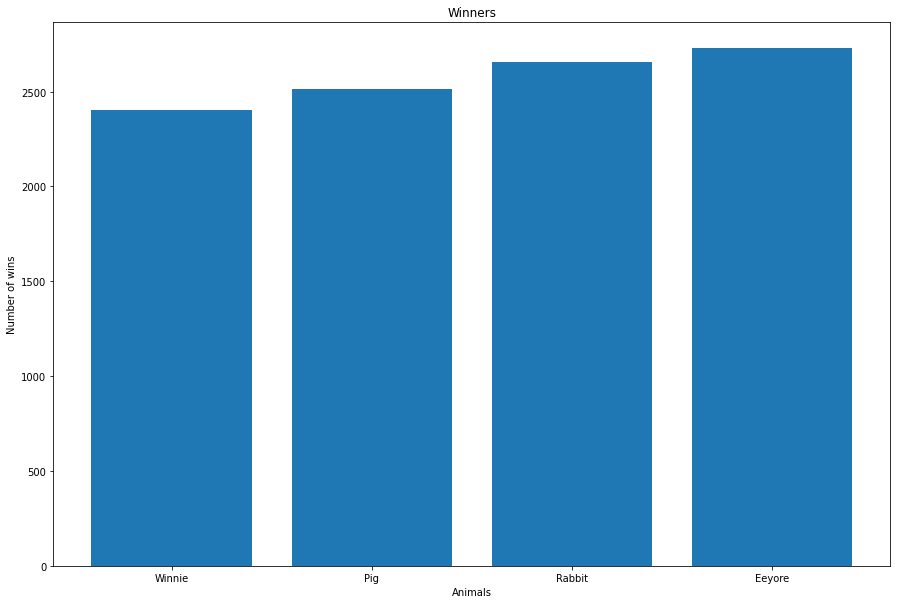

In [20]:
plt.figure(figsize=(15, 10))
anim = ["Winnie", "Pig", "Rabbit", "Eeyore"]
counts = [len(np.where(u==0)[0]), len(np.where(u==1)[0]), len(np.where(u==2)[0]), len(np.where(u==3)[0])]
plt.bar(anim, counts)
plt.title("Winners")
plt.xlabel("Animals")
plt.ylabel("Number of wins");

These distributions give approximately the same number of wins for large observations.

Task number 2

In [21]:
vp = v + p
ke = k + e

In [22]:
vp1 = vp.reshape(-1, n)
ke1 = ke.reshape(-1, n)

In [23]:
c = np.hstack((vp1, ke1))
c

array([[ 2.8520894 ,  3.42608187,  1.12277761, ...,  1.        ,
         3.        ,  3.        ],
       [ 4.81558889,  3.67652638,  3.19021916, ...,  2.        ,
         2.        ,  2.        ],
       [ 1.3985214 ,  3.06371341,  2.52295822, ...,  2.        ,
         1.        ,  3.        ],
       ...,
       [ 2.60095452,  1.64847019,  0.34054327, ...,  5.        ,
         3.        ,  2.        ],
       [ 2.33755774,  4.5790796 , -0.13948763, ...,  1.        ,
         2.        ,  2.        ],
       [ 6.68512949,  1.20705573,  4.94410601, ...,  3.        ,
         2.        ,  1.        ]])

In [24]:
z = c.reshape(10**4, 2, n)
z

array([[[ 2.8520894 ,  3.42608187,  1.12277761, ...,  1.86517389,
          1.90524485,  1.28369156],
        [ 1.        ,  4.        ,  0.        , ...,  1.        ,
          3.        ,  3.        ]],

       [[ 4.81558889,  3.67652638,  3.19021916, ...,  4.72654553,
          1.12180794,  4.1766833 ],
        [ 2.        ,  4.        ,  4.        , ...,  2.        ,
          2.        ,  2.        ]],

       [[ 1.3985214 ,  3.06371341,  2.52295822, ...,  1.56972061,
          3.13152503,  4.84332973],
        [ 4.        ,  2.        ,  3.        , ...,  2.        ,
          1.        ,  3.        ]],

       ...,

       [[ 2.60095452,  1.64847019,  0.34054327, ...,  5.27134733,
          1.9340266 ,  0.61598002],
        [ 1.        ,  3.        ,  2.        , ...,  5.        ,
          3.        ,  2.        ]],

       [[ 2.33755774,  4.5790796 , -0.13948763, ...,  1.22683327,
          1.83312344,  2.30122488],
        [ 1.        ,  2.        ,  0.        , ...,  1.     

In [25]:
o = z.sum(axis=2)
o

array([[19.51303488, 20.        ],
       [29.63269099, 20.        ],
       [19.95970301, 31.        ],
       ...,
       [17.50621028, 28.        ],
       [17.55007142, 17.        ],
       [29.50868079, 22.        ]])

In [26]:
m = o.max(axis=1)
m

array([20.        , 29.63269099, 31.        , ..., 28.        ,
       17.55007142, 29.50868079])

In [27]:
pp = m[:, np.newaxis]
pp

array([[20.        ],
       [29.63269099],
       [31.        ],
       ...,
       [28.        ],
       [17.55007142],
       [29.50868079]])

In [28]:
u = np.where(pp==o)
u = u[1]
u

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

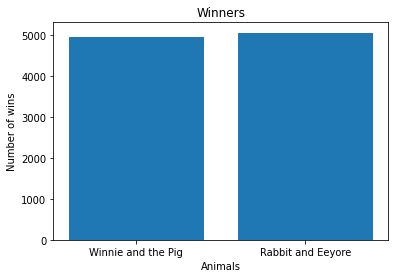

In [29]:
anim = ["Winnie and the Pig", "Rabbit and Eeyore"]
counts = [len(np.where(u==0)[0]), len(np.where(u==1)[0])]
plt.bar(anim, counts)
plt.title("Winners")
plt.xlabel("Animals")
plt.ylabel("Number of wins");

The results are logical, the teams are very close, but the second team wins a little more often.

## 3. Avito (30 points)

In this task, you will need to write a function that parses [Avito](https://www.avito.ru) (we will consider only Moscow). This function takes two parameters:
* search - what we are looking for on avito
* page - number of the page from which we are parsing information

```python
def parse_page(search, page):
    
df = parse_page('buckwheat', 4)
```
You need to download the following information:
* Title Ad
* link to ad
* price
* metro (if available), you need to handle None carefully or use a try-except construct
* how many meters from the metro (if any)

This information is best saved as a pandas df.

In this task **you don't** parse all pages (you may get banned). You just need to make a function that parses one page. To avoid being banned, make a request once and work with your page without a function. Once everything is ready, wrap all of your code in a function.

In [30]:
import requests
from bs4 import BeautifulSoup

In [31]:
def parse_page(search, page):
    url = f'https://www.avito.ru/moskva?q={search}&p={page}'
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    items = tree.find_all('div', {'class' : 'snippet-horizontal'})
    table = []
    for g in range(len(items)):
        name = items[g].find('a', {'class' : 'snippet-link'}).text
        url = 'https://www.avito.ru/' + items[g].find('a', {'class' : 'snippet-link'}).get('href')
        price = items[g].find('span', {'class' : 'snippet-price'}).text.strip()
        if items[g].find('span', {'class' : 'item-address-georeferences-item-icons'}) != None:
            try:
                metro = items[g].find('span', {'class' : 'item-address-georeferences-item__content'}).text
            except:
                metro = 'None'
        else:
            metro = 'None'
        try:
            distance = items[g].find('span', {'class' : 'item-address-georeferences-item__after'}).text.strip()
            i = 0
            while distance[i] != '\xa0':
                i += 1
            distance = distance[0:i] + ' ' + distance[i+1:]
        except:
            distance = 'None'
        table.append({'Name': name,
                             'URL': url,
                             'Price': price,
                             'Metro': metro,
                             'Distance': distance})
    df = pd.DataFrame(table)
    print(df)

In [32]:
print(parse_page('iphone 10', 3))

                                                 Name  \
0                   iPhone 5/6/7/8/X/XS/7 plus/8 plus   
1               iPhone 6/6s/7/8/ plus /X/XR/XS/XS MAX   
2      iPhone 5s/6/6s/6s+/SE/7/7+/8/8+/X/XR/xs/XS Max   
3                                     iPhone X 256 gb   
4                                   iPhone X в идеале   
5                 iPhone X 256 Гб, Ростест, с Face ID   
6                                  Чехол для iPhone X   
7                                            iPhone X   
8                         IPhone6s/8/X/XR/7/SE/6 plus   
9                               iPhone X 64GB. Silver   
10  Игровой мини компьютер Ryzen 5 1600/DDR4 16/1050t   
11                       iPhone X 64GB black оригинал   
12                   iPhone X space grey, без царапин   
13                      iPhone X 64GB белый идеальный   
14                                     iPhone X 256gb   
15                         iPhone X 64 gb без царапин   
16                             

## 4. Walmart (30 баллов)

The *walmart.csv* file provides us with historical sales data for Walmart stores located in different regions.

The following variables are available to us:

* **Date** – date;
* **Store** – store number;
* **Dept** – department number;
* **Weekly_Sales** – sales volume for the given week in the given department
* **Type** – shop type;
* **Size** – magazine size;
* **IsHoliday** – whether the week is a holiday;
* **Temperature** - average temperature in the region in degrees Fahrenheit;
* **Fuel_Price** – fuel cost in the region;
* **MarkDown1-5** is data related to promotional markdowns that Walmart is running. These markdowns are only available after November 2011 and are not available in all stores. The data is anonymized. It is not clear which goods were discounted and in what quantities. Companies often anonymize data when they make it public.
* **CPI** – consumer price index;
* **Unemployment** - unemployment rate.


You need to complete the following tasks:
1. Upload a data file. Display the first and last 5 observations. Find out how many observations and variables are in your dataset. What type (format) does each variable have? Convert the Date variable to date format.
2. Deal with missing values:
    * display how many missing values ​​in percentage are in each variable;
    * remove variables that have more than 60% missing values.
3. How many stores and departments are in the sample, for what time period do we have data?
4. View sales dynamics in Walmart stores in general. To do this, you can build a graph where the X-axis is the date, and the Y-axis is the sale of the entire Walmart network.
5. Find and draw a correlation matrix for numerical indicators.
6. Find the top 5 biggest stores by total sales of all time and display their sales dynamics in one graph.
7. Find the top 10 largest departments by total sales in 2011 among stores with type A and draw a bar chart for them

№1

In [30]:
import datetime

In [31]:
df = pd.read_csv('walmart.csv')

In [32]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [33]:
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [34]:
df.tail(5)

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418239 entries, 0 to 418238
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         418239 non-null  int64         
 1   Date          418239 non-null  datetime64[ns]
 2   Dept          418239 non-null  int64         
 3   Weekly_Sales  418239 non-null  float64       
 4   IsHoliday     418239 non-null  bool          
 5   Type          418239 non-null  object        
 6   Size          418239 non-null  int64         
 7   Temperature   418239 non-null  float64       
 8   Fuel_Price    418239 non-null  float64       
 9   MarkDown1     147484 non-null  float64       
 10  MarkDown2     108144 non-null  float64       
 11  MarkDown3     134568 non-null  float64       
 12  MarkDown4     132315 non-null  float64       
 13  MarkDown5     148182 non-null  float64       
 14  CPI           418239 non-null  float64       
 15  Unemployment  418

№2

In [36]:
df.isna().sum()

Store                0
Date                 0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270755
MarkDown2       310095
MarkDown3       283671
MarkDown4       285924
MarkDown5       270057
CPI                  0
Unemployment         0
dtype: int64

In [43]:
print('Missing values:' + '\n' + 'In all variables 0%, except:' + '\n' + 'MarkDown1 - ' + str(270755 / (147484 + 270755) * 100) + ' %' + '\n' + 'MarkDown2 - ' + str(310095 / (310095 + 108144) * 100) + ' %' + '\n' + 'MarkDown3 - ' + str(283671 / (283671 + 134568) * 100) + ' %' + '\n' + 'MarkDown4 - ' + str(285924 / (285924 + 132315) * 100) + ' %' + '\n' + 'MarkDown5 - ' + str(270057 / (270057 + 148182) * 100) + ' %')

Missing values:
In all variables 0%, except:
MarkDown1 - 64.73690880094874 %
MarkDown2 - 74.14301392266145 %
MarkDown3 - 67.82509522067525 %
MarkDown4 - 68.3637824306198 %
MarkDown5 - 64.57001857789446 %


In [44]:
df.drop(['MarkDown1' , 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


№3

In [46]:
print('Data are available from ',end='')
print(df['Date'][0],end='')
print(' до ',end='')
print(df['Date'][len(df['Date']) - 1],end='')
print(', that is, for ',end='')
print(df['Date'][len(df['Date']) - 1] - df['Date'][0])

Data are available from 2010-02-05 00:00:00 до 2012-10-19 00:00:00, that is, for 987 days 00:00:00


In [47]:
print('Stores in the selection - ' + str(df['Store'].nunique()) + ', departments in the selection - ' + str(df['Dept'].nunique()))

Stores in the selection - 45, departments in the selection - 81


№4

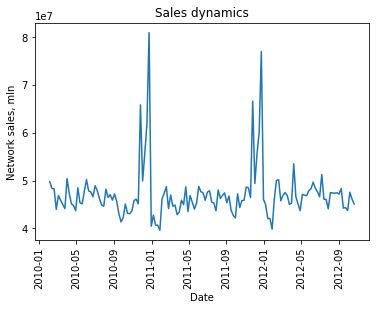

In [48]:
plt.plot(df[['Weekly_Sales', 'Date']].groupby('Date').sum())
plt.title('Sales dynamics')
plt.xlabel('Date')
plt.ylabel('Network sales, mln')
plt.xticks(rotation=90)
plt.show()

№5

In [49]:
import seaborn as sns
import plotly
import plotly_express as px
import plotly.graph_objects as go

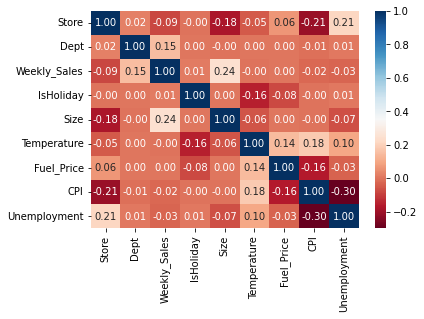

In [50]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu');

№6 Find the top 5 biggest stores by total sales of all time and display their sales dynamics in one graph.

In [52]:
df_top = df.groupby('Store', as_index=False)['Weekly_Sales'].sum()
df_top = df_top.nlargest(5,'Weekly_Sales')
df_trend = df.groupby(['Date','Store'], as_index=False)['Weekly_Sales'].sum()
df_trend = df_trend.merge(df_top, on='Store')
df_trend.rename(columns={'Weekly_Sales_x':'Sales',
                         'Date' : 'Dates'}, 
                inplace=True)
px.line(df_trend, 
        title='Sales dynamics of the 5 largest stores',
        x='Dates', 
        y='Sales', 
        color='Store')

№7 Find the top 10 largest departments by total sales in 2011 among stores with type A and draw a bar chart for them

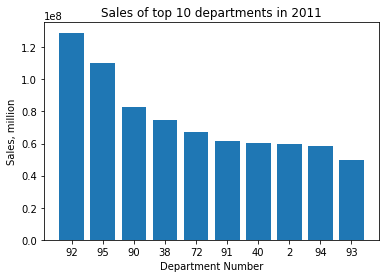

In [53]:
dfa = df.query('(Type == "A") & (2012 > Date >= 2011)')
df_top2 = dfa.groupby('Dept', as_index=False)['Weekly_Sales'].sum()
df_top2 = df_top2.nlargest(10,'Weekly_Sales')
plt.bar(list(map(str, list(df_top2['Dept']))), df_top2['Weekly_Sales'])
plt.title("Sales of top 10 departments in 2011")
plt.xlabel("Department Number")
plt.ylabel("Sales, million");